# Matplotlib Overview 

## Introduction

Attempt to replicate MATLAB's plotting.
- Generally easy to get started for simple plots
- Support for custom labels and texts
- Great control of every element in a figure
- High-quality output in many formats
- Very customizable in general

## Installation 

You'll need to install matplotlib first with either:

    conda install matplotlib
or
    pip install matplotlib
   

## Importing
Import the `matplotlib.pyplot` module under the name `plt` (the tidy way):

In [4]:
import matplotlib.pyplot as plt

You'll also need to use this line to see plots in the notebook:

In [5]:
%matplotlib inline

That line is only for jupyter notebooks, if you are using another editor, you'll use: **plt.show()** at the end of all your plotting commands to have the figure pop up in another window.

### Example

**The data we want to plot:**

In [6]:
import numpy as np
x = np.linspace(0, 5, 10) # numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
y = x ** 2

np.linspace() Returns num evenly spaced samples, calculated over the interval [start, stop].

In [7]:
x

array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ])

In [8]:
y

array([ 0.        ,  0.30864198,  1.2345679 ,  2.77777778,  4.9382716 ,
        7.71604938, 11.11111111, 15.12345679, 19.75308642, 25.        ])

## Basic Matplotlib Commands - Option 1 (Functional way)

We can create a very simple line plot using the following <br>( I encourage you to pause and use Shift+Tab along the way to check out the document strings for the functions we are using).

Text(0.5, 1.0, 'String Title Here')

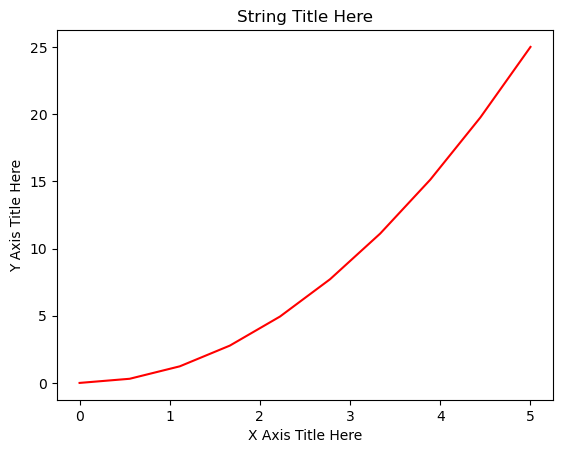

In [9]:
plt.plot(x, y, 'r') # 'r' is the color red
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here')

## Creating subplots

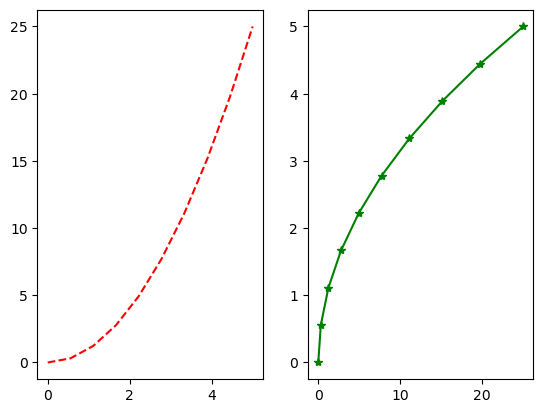

In [10]:
# plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1) #the figure has 1 row, 2 columns, and this plot is the first plot.
plt.plot(x, y, 'r--') # More on color options later
plt.subplot(1,2,2)#the figure has 1 row, 2 columns, and this plot is the second plot.
plt.plot(y, x, 'g*-');

## Option 2 - Object Oriented

There is another option to create a graph by initializing figure objects and then call methods or attributes from that object:

To begin we create a figure instance. Then we can add axes to that figure:

Text(0.5, 1.0, 'Set Title')

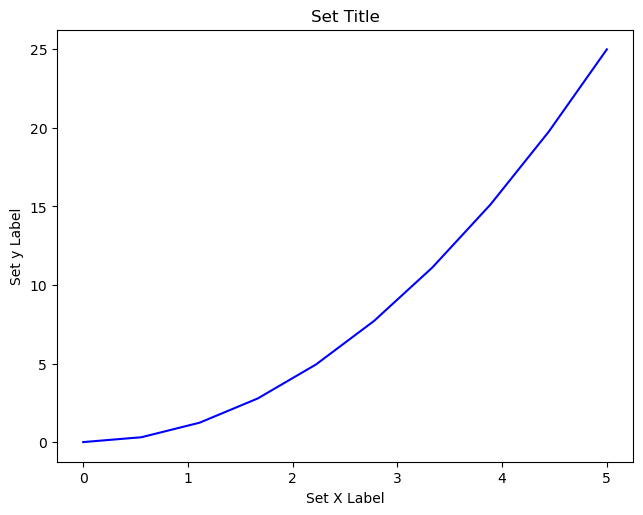

In [11]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0.2, 0.2, 0.9, 0.9]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(x, y, 'b')
axes.set_xlabel('Set X Label') # Notice the use of set_ to begin methods
axes.set_ylabel('Set y Label')
axes.set_title('Set Title')

In [12]:
fig1 = plt.figure()
fig1

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Code is a little more complicated, but the advantage is that now we have full control of where the plot axes are placed, and we can easily add more than one axis to the figure:

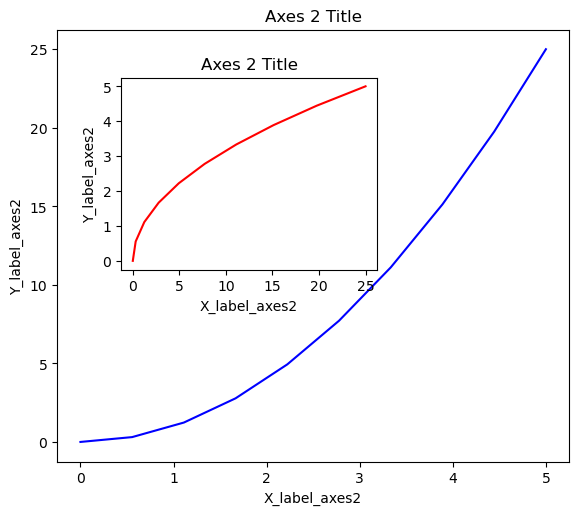

In [13]:
# Creates blank canvas
fig = plt.figure()

## left, bottom, width, height
axes1 = fig.add_axes([0.2, 0.2, 0.8, 0.9]) # main axes
axes2 = fig.add_axes([0.3, 0.6, 0.4, 0.4]) # inset axes

# Larger Figure Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes2')
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('Axes 2 Title')

# Insert Figure Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

## subplots()

The plt.subplots() object will act as a more automatic axis manager.

Basic use cases:

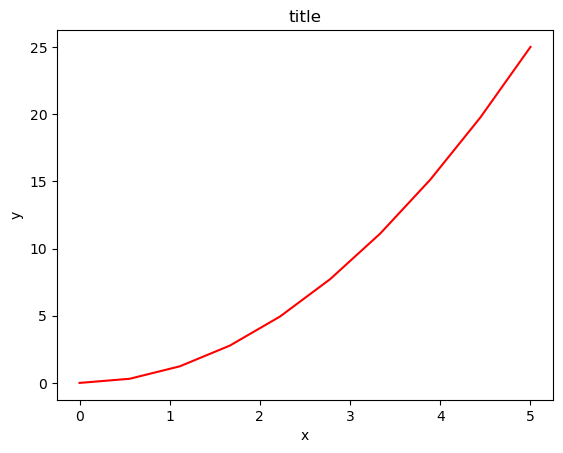

In [14]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots()

# Now use the axes object to add stuff to plot
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

Then you can specify the number of rows and columns when creating the subplots() object:

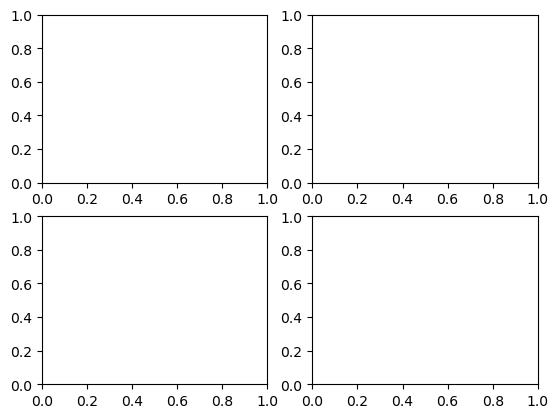

In [15]:
# Empty canvas of 2 by 2 subplots
fig, axes = plt.subplots(nrows=2, ncols=2)

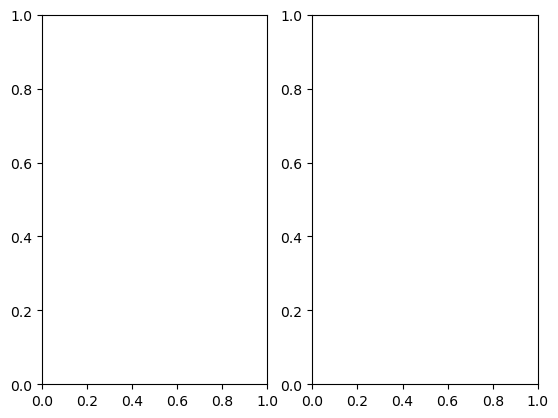

In [16]:
# Empty canvas of 1 by 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2)

In [17]:
# Axes is an array of axes to plot on
axes

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

We can iterate through this array:

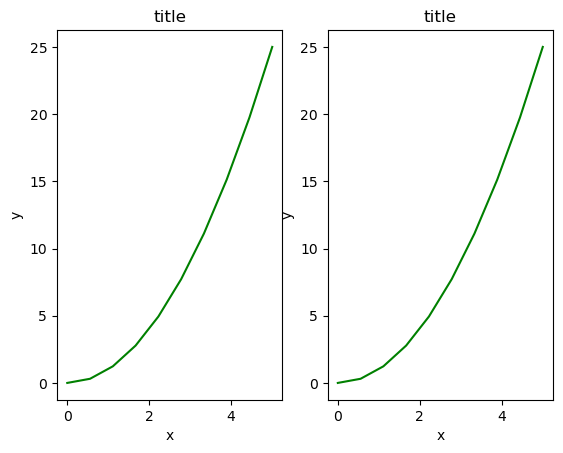

In [18]:
for ax in axes:
    ax.plot(x, y, 'g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

# Display the figure object    
fig

A common issue with matplolib is overlapping subplots or figures. We can use **fig.tight_layout()** or **plt.tight_layout()** method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

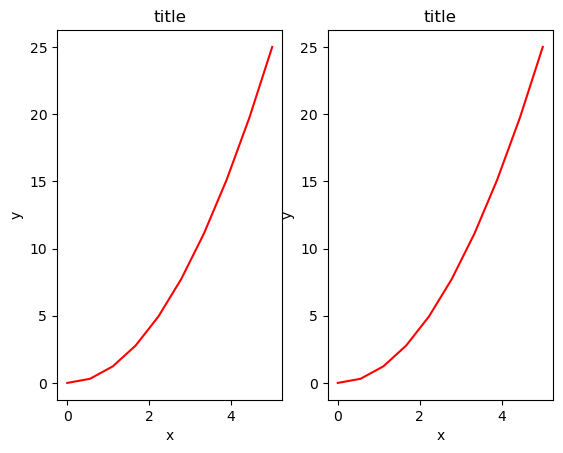

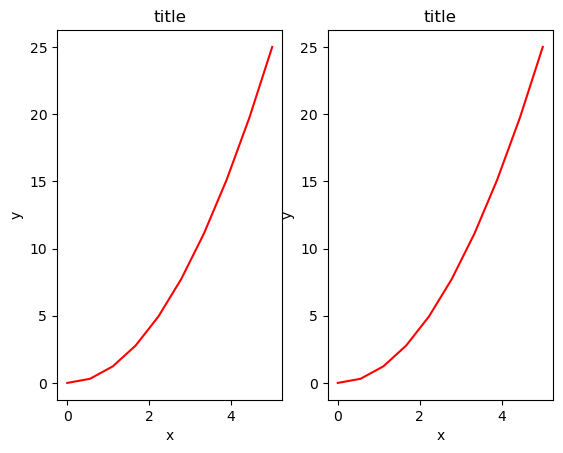

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

fig    
#plt.tight_layout()

### Figure size, aspect ratio and DPI 

We can define the aspect ratio (width vs. height), DPI and figure size when the Figure object is created.  
* `figsize` is a tuple of the width and height of the figure in inches
* `dpi` is the dots-per-inch (pixel per inch). 

For example:

In [20]:
fig = plt.figure(figsize=(8,5), dpi=100)

<Figure size 800x500 with 0 Axes>

The same arguments can also be passed to layout managers, such as the `subplots` function:

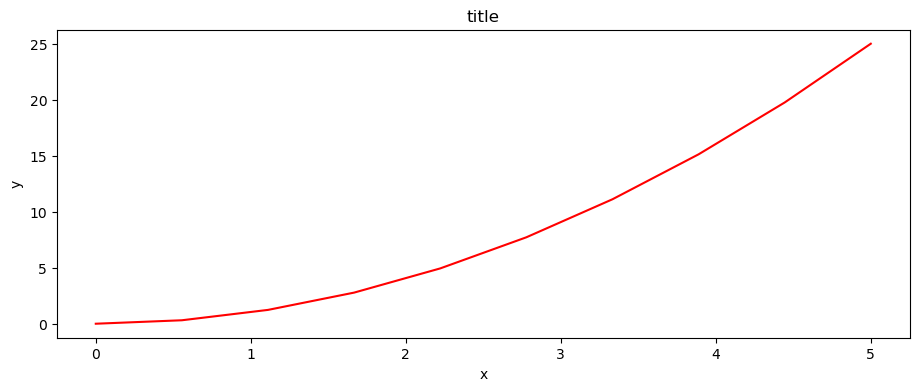

In [21]:
fig, axes = plt.subplots(figsize=(11,4))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

**What is the dpi?** 

This is determined by the size of the elements inside the figure. Most elements like lines, markers, texts have a size given in points.
Matplotlib figures use **dots per inch (dpi) of 72**. A line with thickness 1 point will be 1./72. inch wide. A text with fontsize 12 points will be 12./72. inch heigh.

If you change the figure size in inches, points will not change, so a larger figure in inches still has the same size of the elements. Changing the figure size is thus like taking a piece of paper of a different size. Doing so, would not change the width of the line drawn with the same pen.

On the other hand, changing the dpi scales those elements. At 72 dpi, a line of 1 point size is one pixel strong. At 144 dpi, this line is 2 pixels strong. A larger dpi will therefore act like a magnifying glass. All elements are scaled by the magnifying power of the lens.

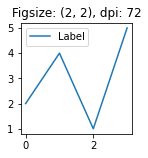

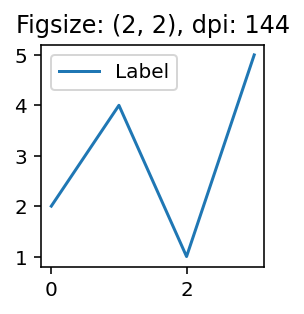

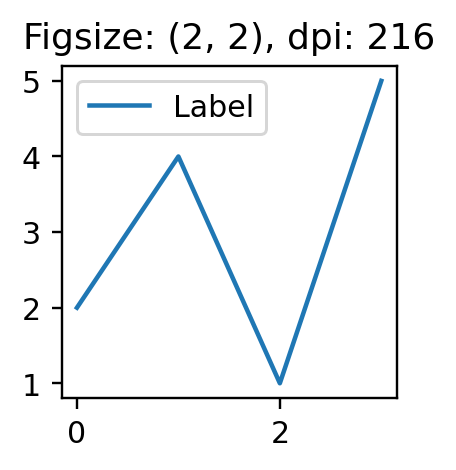

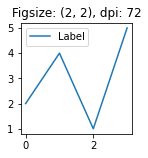

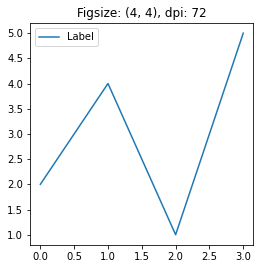

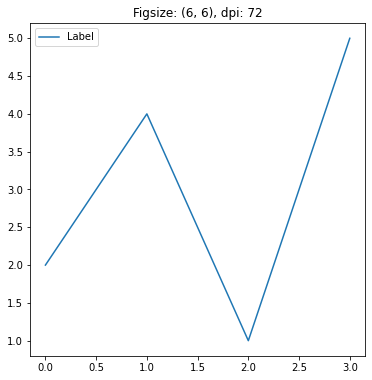

In [22]:
%matplotlib inline
# fig, axes = plt.subplots(nrows=1, ncols=2)


def plot(fs,dpi):
    fig, axes =plt.subplots(figsize=fs, dpi=dpi)
    axes.set_title("Figsize: {}, dpi: {}".format(fs,dpi))
    axes.plot([2,4,1,5], label="Label")
    axes.legend()

figsize=(2,2)
for i in range(1,4):
    plot(figsize, i*72)

dpi=72
for i in [2,4,6]:
    plot((i,i), dpi)

## Saving figures
Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF. 

To save a figure to a file we can use the `savefig` method in the `Figure` class:

In [23]:
fig.savefig("filename.png")

Here we can also optionally specify the DPI and choose between different output formats:

In [24]:
fig.savefig("filename.png", dpi=72)

____
## Legends, labels and titles

**Figure titles**

A title can be added to each axis instance in a figure. To set the title, use the `set_title` method in the axes instance:

In [25]:
ax.set_title("title");

**Axis labels**

Similarly, with the methods `set_xlabel` and `set_ylabel`, we can set the labels of the X and Y axes:

In [26]:
ax.set_xlabel("x")
ax.set_ylabel("y");

### Legends

You can use the **label="label text"** keyword argument when plots or other objects are added to the figure, and then using the **legend** method without arguments to add the legend to the figure: 

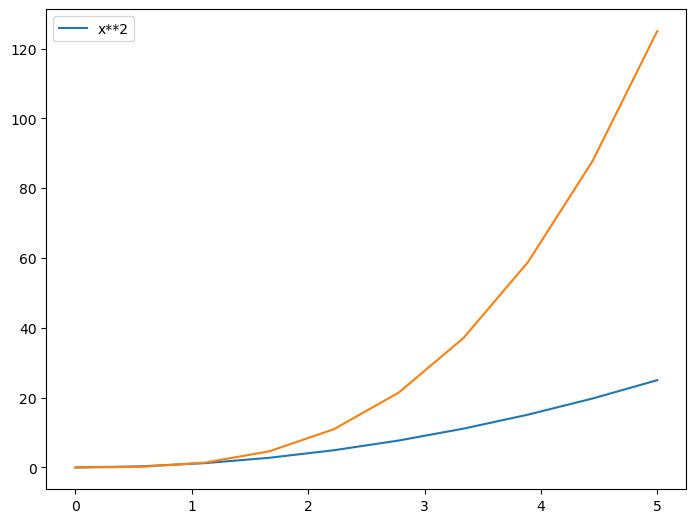

In [27]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3)# label="x**3")
ax.legend()

Notice how are legend overlaps some of the actual plot!

The **legend** function takes an optional keyword argument **loc** that can be used to specify where in the figure the legend is to be drawn. The allowed values of **loc** are numerical codes for the various places the legend can be drawn. See the [documentation page](http://matplotlib.org/users/legend_guide.html#legend-location) for details. Some of the most common **loc** values are:

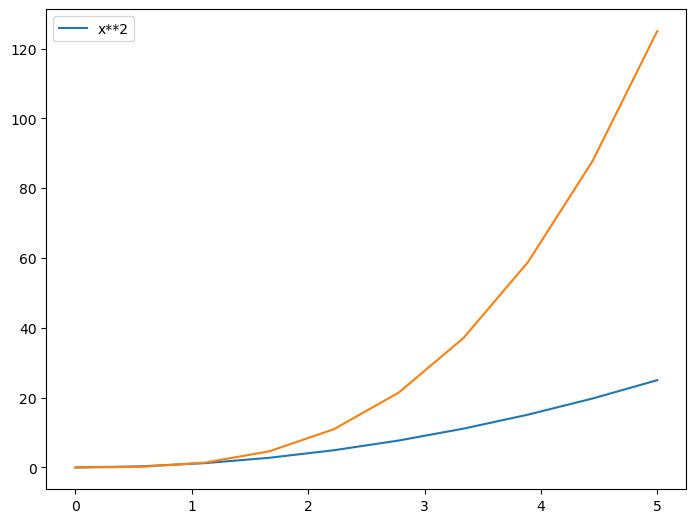

In [28]:
# Lots of options....

ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner

#many more options are available

# Most common to choose
ax.legend(loc=0) # let matplotlib decide the optimal location
fig

# Solve Q1-3 on Exercise #8 
~~~~~~~

## Setting colors, linewidths, linetypes

Matplotlib gives you *a lot* of options for customizing colors, linewidths, and linetypes. 

There is the basic MATLAB like syntax (which I would suggest you avoid using for more clairty sake:

### Colors with MatLab like syntax

With matplotlib, we can define the colors of lines and other graphical elements in a number of ways. First of all, we can use the MATLAB-like syntax where `'b'` means blue, `'g'` means green, etc. The MATLAB API for selecting line styles are also supported: where, for example, 'b.-' means a blue line with dots:

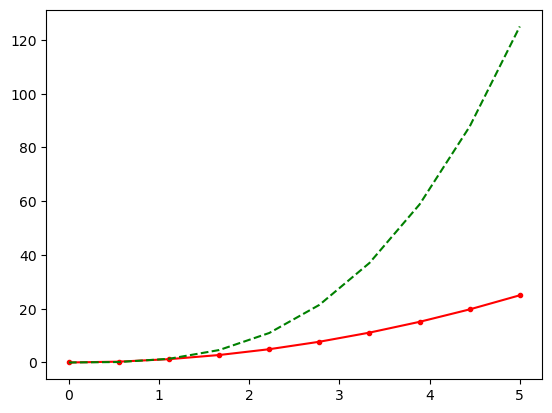

In [29]:
# MATLAB style line color and style 
fig, ax = plt.subplots()
ax.plot(x, x**2, 'r.-') # red line with dots
ax.plot(x, x**3, 'g--') # green dashed line

### Colors with the color= parameter

We can also define colors by their names or RGB hex codes and optionally provide an alpha value using the `color` and `alpha` keyword arguments. Alpha indicates opacity.

HEX, which stands for Hexadecimal, is also used onscreen and is basically a short code for RGB color. A HEX color is a six-digit combination of letters and numbers. The first two numbers represent red, the middle two represent green, and the last two represent blue.

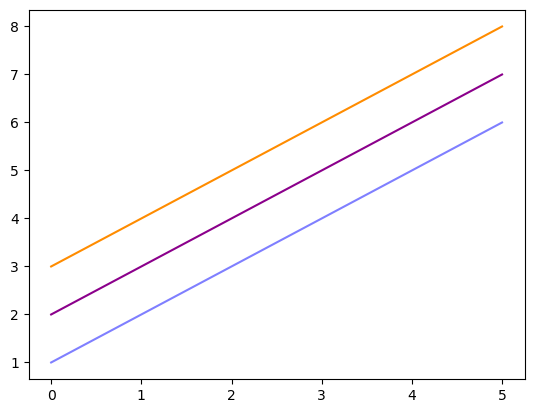

In [30]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="blue", alpha=0.5) # half-transparant
ax.plot(x, x+2, color="#8B008B")        # RGB hex code
ax.plot(x, x+3, color="#FF8C00")        # RGB hex code 

### Line and marker styles

To change the line width, we can use the `linewidth` or `lw` keyword argument. The line style can be selected using the `linestyle` or `ls` keyword arguments:

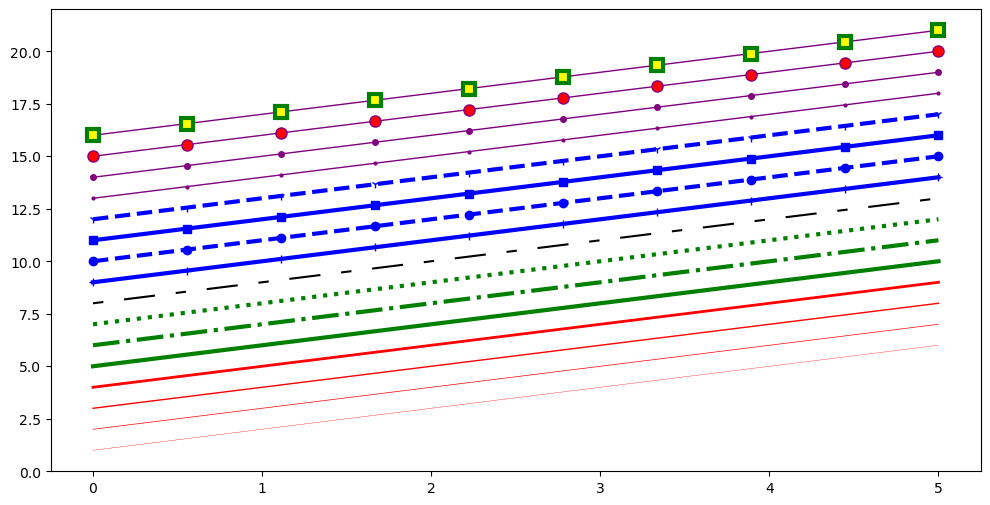

In [31]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=3, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

### Control over axis appearance

In this section we will look at controlling axis sizing properties in a matplotlib figure.

## Plot range

We can configure the ranges of the axes using the `set_ylim` and `set_xlim` methods in the axis object

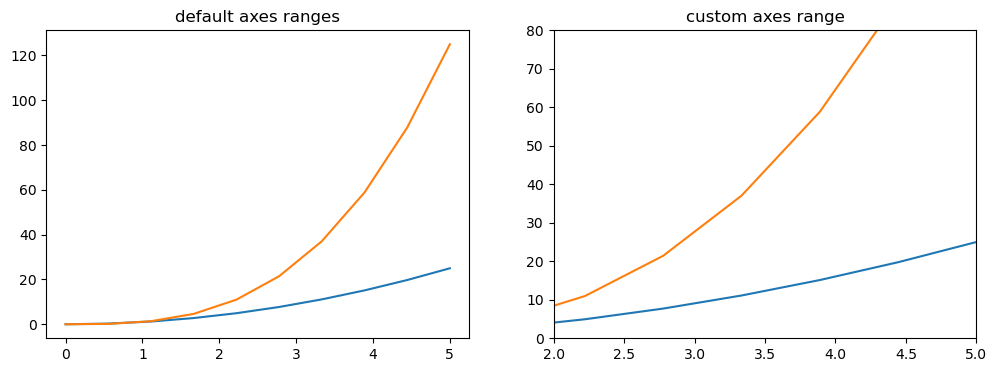

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")


axes[1].plot(x, x**2, x, x**3)
axes[1].set_ylim([0, 80])
axes[1].set_xlim([2, 5])
axes[1].set_title("custom axes range");

# Solve Q4 on Exercise #8 
~~~~~~~

# Special Plot Types

There are many specialized plots we can create, such as barplots, histograms, scatter plots, and much more. Most of these type of plots we will actually create using seaborn, a statistical plotting library for Python. But here are a few examples of these type of plots:

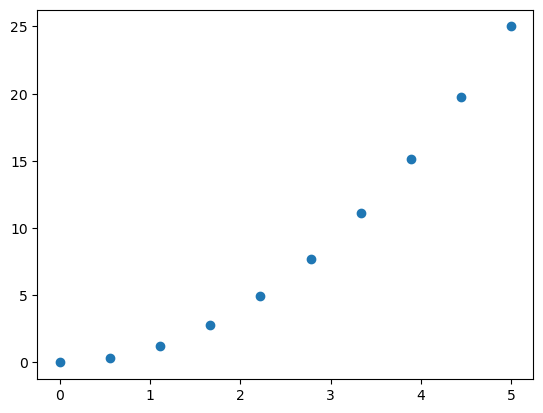

In [33]:
plt.scatter(x,y)

(array([13., 13.,  9., 13., 10.,  7.,  7.,  8.,  8., 12.]),
 array([  5. , 102.8, 200.6, 298.4, 396.2, 494. , 591.8, 689.6, 787.4,
        885.2, 983. ]),
 <BarContainer object of 10 artists>)

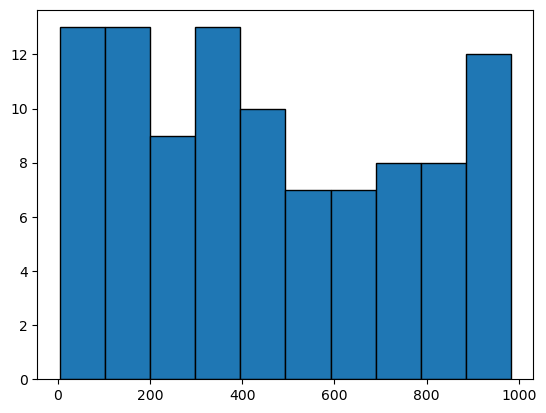

In [34]:
from random import sample
import matplotlib.pyplot as plt

data = sample(range(1, 1000), 100)
plt.hist(data,histtype='bar', ec='black')

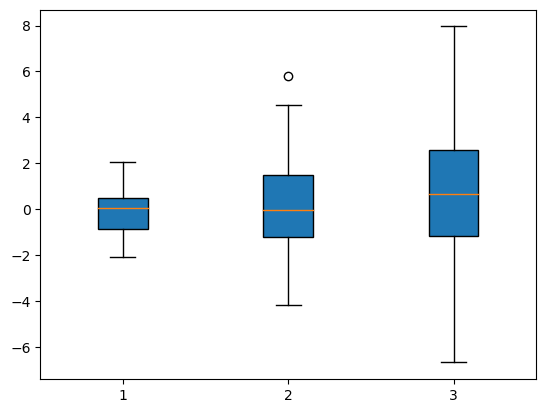

In [35]:
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

# rectangular box plot
plt.boxplot(data,vert=True,patch_artist=True);   

### Axis grid

With the `grid` method in the axis object, we can turn on and off grid lines. We can also customize the appearance of the grid lines using the same keyword arguments as the `plot` function:

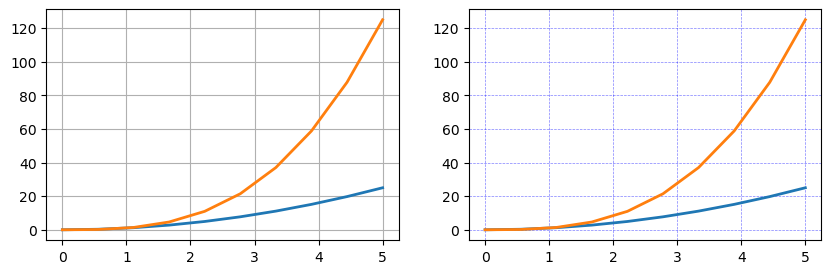

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))

# default grid appearance
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)

# custom grid appearance
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

### Twin axes

Sometimes it is useful to have dual x or y axes in a figure; for example, when plotting curves with different units together. Matplotlib supports this with the `twinx` and `twiny` functions:

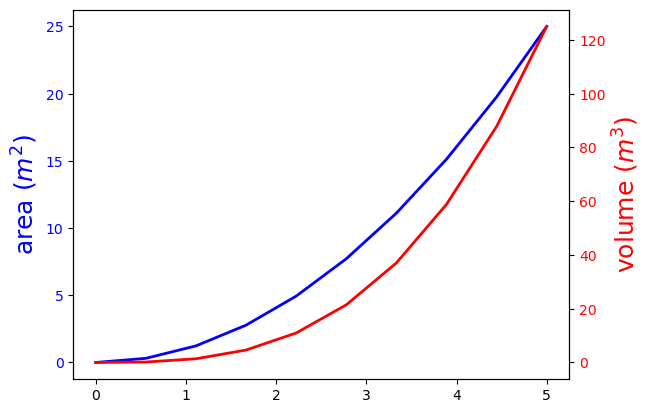

In [37]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx() #use the same X
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

## Further reading

* https://matplotlib.org/2.0.2/gallery.html - A large gallery showcaseing various types of plots matplotlib can create. Highly recommended! 